###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Part B: Linear Regression with Real-World Data (5 Points)

### Airfare and demand: target − > price

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

#### 1. A set of training data Dtrain = ${(x^1, y^1),(x^2, y^2), ...,(x^N, y^N)}$, where $x ∈ R^M, y ∈R$, where N is number of training examples and M is number of features

#### Linear Regression model is given as $\hat{y^n} =  \sum \limits _{m=1} ^{M} {\beta}_{m}x^n_{m} $

#### Least square loss function is given as $l(x,y) =  \sum \limits _{n=1} ^{N} (y^n - \hat{y^n})^2 $


In [2]:
airline_dataframe=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\airq402.data",header=None,delim_whitespace=True)

In [3]:
airline_dataframe.columns =['City1', 'City2', 'Average_Fare', 'Distance',
                            'Average_weekly_passengers', 'market_leading_airline', 
                            'market_share', 'Average_fare', 'Low_price_airline', 'market_share_2','price']

In [4]:
airline_dataframe

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [5]:
airline_dataframe.corr()


,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_2,price
Average_Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average_weekly_passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market_share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average_fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market_share_2,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


#### Minimize the loss function l(x, y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000. Explain your choice [hint: the following plots might be useful in your choice.]


#### You can choose three suitable values of step length α > 0. For each value of step length perform the learning and record
 - In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and (when imax is reached), plot it against iteration number i. Explain the graph.
 - In each iteration step also calculate RMSE on test set RMSE and plot it against iteration number i. Explain the graph.


In [6]:
df1=airline_dataframe[["Average_Fare","Distance","price"]]

In [7]:
df1.corr()

,Average_Fare,Distance,price
Average_Fare,1.000000,0.587169,0.866410
Distance,0.587169,1.000000,0.583239
price,0.866410,0.583239,1.000000


In [8]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [9]:
X=df_train.iloc[:,0:2]
y=df_train.iloc[:,2:]
X_test=df_test.iloc[:,0:2]
y_test=df_test.iloc[:,2:]
y_test

,price
0,111.03
2,167.12
6,148.59
7,174.00
10,200.93
...,...
988,143.53
991,66.32
994,252.34
996,82.55


In [10]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [11]:
def minimise_gd(X,y,alpha,beta,imax,epsilon,m):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
#         print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
#         print((least_square_function(X, y, beta_old)-least_square_function(X, y, beta)).item(0))
#         if ((least_square_function(X, y, beta_old)-least_square_function(X, y, beta)).item(0)<epsilon):
#             print("Inside Function") 
#             return beta,J_history,abs_value,rmse_value
#         elif (i==imax):
#             print("Did not converge in imax iteration")
    return beta,J_history,abs_value,rmse_value
    
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

### Step length α = 0.000000001

In [12]:
#Case 1 with alpha=0.000000001
alpha=0.000000001
imax=800
epsilon=0.006
# epsilon=0.1
beta=np.zeros([3,1])
beta_old=np.zeros([3,1])
a,b,c,d=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

Final beta value is [[7.45968760e-05]
 [1.31373938e-02]
 [7.67841707e-02]]
Function values are [7183825662.966352, 7165816811.268484, 7147862590.734757, 7129962835.538419, 7112117380.356062, 7094326060.3661, 7076588711.247251, 7058905169.177005, 7041275270.830125, 7023698853.377123, 7006175754.48277, 6988705812.304586, 6971288865.49134, 6953924753.181577, 6936613315.0021105, 6919354391.066556, 6902147821.973841, 6884993448.806742, 6867891113.130411, 6850840656.990915, 6833841922.913768, 6816894753.902483, 6799998993.43712, 6783154485.47284, 6766361074.4384575, 6749618605.23501, 6732926923.234324, 6716285874.277574, 6699695304.673877, 6683155061.198856, 6666664991.093234, 6650224942.061418, 6633834762.270088, 6617494300.346806, 6601203405.3786, 6584961926.910585, 6568769714.944562, 6552626619.937637, 6536532492.800837, 6520487184.897732, 6504490548.043065, 6488542434.501377, 6472642696.985643, 6456791188.655917, 6440987763.117966, 6425232274.421922, 6409524577.06093, 6393864525.969812, 

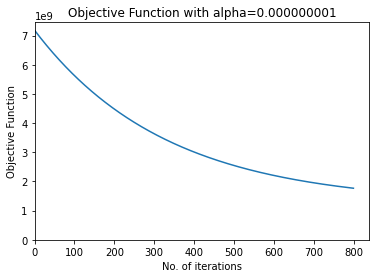

In [13]:
plt.title('Objective Function with alpha=0.000000001')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[800,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

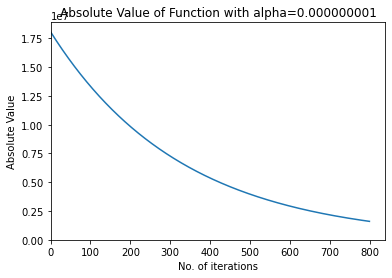

In [14]:
plt.title('Absolute Value of Function with alpha=0.000000001')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[800,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

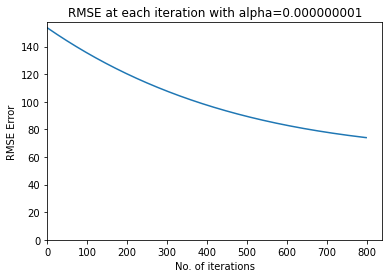

In [15]:
plt.title('RMSE at each iteration with alpha=0.000000001')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

##### In the above graph, we see that initially, the error reduces significantly. But as iterations increase, there is not much reduction seen in the error.

### Step length α = 0.000000002

In [16]:
#Case 2 with alpha=0.000000002
alpha=0.000000002
imax=100
epsilon=0.006
beta=np.zeros([3,1])
beta_old=np.zeros([3,1])
print(np.shape(X))
beta_value_2,least_square_function_2,abs_value_function_2,rmse_value_function_2=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",beta_value_2)
print("Function values are",least_square_function_2)
print("Absolute values are",abs_value_function_2)
print("RMSE at each step is",rmse_value_function_2)

(800, 3)
Final beta value is [[2.53077074e-05]
 [4.49884550e-03]
 [2.86776249e-02]]
Function values are [7165789454.182559, 7129908453.145724, 7094244981.427993, 7058797719.461438, 7023565355.682863, 6988546586.485245, 6953740116.169461, 6919144656.896332, 6884758928.638924, 6850581659.135175, 6816611583.840784, 6782847445.882398, 6749287996.011066, 6715931992.556011, 6682778201.378636, 6649825395.826847, 6617072356.689632, 6584517872.151928, 6552160737.749748, 6519999756.325595, 6488033737.984136, 6456261500.04815, 6424681867.014742, 6393293670.511818, 6362095749.254835, 6331086949.003799, 6300266122.520544, 6269632129.526239, 6239183836.659194, 6208920117.432876, 6178839852.1942215, 6148941928.082173, 6119225238.986486, 6089688685.506767, 6060331174.91178, 6031151621.098984, 6002148944.554322, 5973322072.312263, 5944669937.916063, 5916191481.378298, 5887885649.1416025, 5859751394.03968, 5831787675.258522, 5803993458.29788, 5776367714.932961, 5748909423.176368, 5721617567.240249, 5694

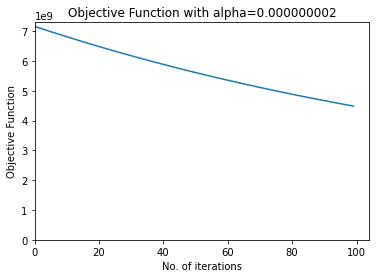

In [17]:
plt.title('Objective Function with alpha=0.000000002')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(least_square_function_2,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

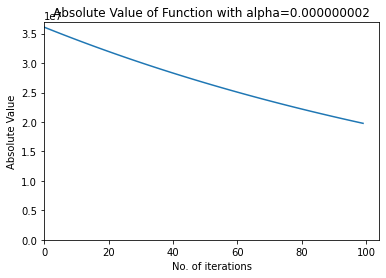

In [18]:
plt.title('Absolute Value of Function with alpha=0.000000002')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value_function_2,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

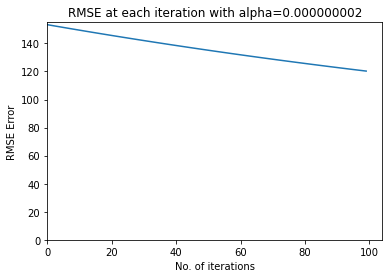

In [19]:
plt.title('RMSE at each iteration with alpha=0.000000002')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(rmse_value_function_2)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

### Step length α = 0.000000004

In [20]:
#Case 3 with alpha=0.000000004
alpha=0.000000004
imax=100
epsilon=0.006
beta=np.zeros([3,1])
beta_old=np.zeros([3,1])
print(np.shape(X))
beta_value_3,least_square_function_3,abs_value_function_3,rmse_value_function_3=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",beta_value_3)
print("Function values are",least_square_function_3)
print("Absolute values are",abs_value_function_3)
print("RMSE at each step is",rmse_value_function_3)

(800, 3)
Final beta value is [[4.53534315e-05]
 [8.03790748e-03]
 [4.98609311e-02]]
Function values are [7129799357.844538, 7058582169.98992, 6988227176.019023, 6918723931.429775, 6850062118.24367, 6782231543.473077, 6715222137.607102, 6649023953.115824, 6583627162.972612, 6519022059.194374, 6455199051.399467, 6392148665.383096, 6329861541.7099495, 6268328434.323902, 6207540209.174548, 6147487842.860378, 6088162421.288389, 6029555138.34993, 5971657294.6126, 5914460296.027972, 5857955652.654996, 5802134977.398838, 5746989984.765025, 5692512489.628667, 5638694406.018582, 5585527745.916173, 5533004618.068827, 5481117226.817711, 5429857870.939755, 5379218942.5036745, 5329192925.739834, 5279772395.923814, 5230950018.273508, 5182718546.859555, 5135070823.529001, 5087999776.84198, 5041498421.021278, 4995559854.914629, 4950177260.969578, 4905343904.220757, 4861053131.28944, 4817298369.395208, 4774073125.37959, 4731370984.741531, 4689185610.684546, 4647510743.175417, 4606340198.014283, 45656678

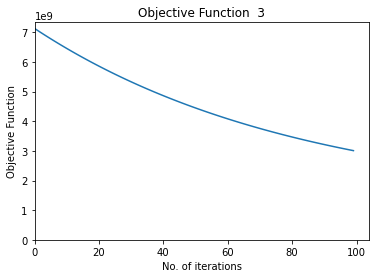

In [21]:
plt.title('Objective Function  3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(least_square_function_3,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

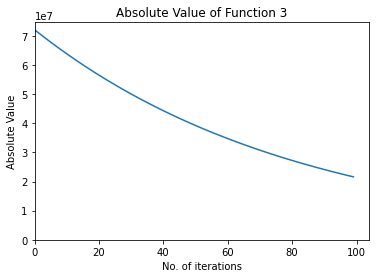

In [22]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value_function_3,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

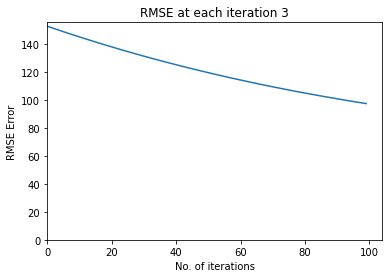

In [23]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(rmse_value_function_3)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

### Exercise 3: Steplength Control for Gradient Descent

#### 1. Steplength-Backtracking as given in lecture slides

In [24]:
df1=airline_dataframe[["Average_Fare","Distance","price"]]

In [25]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [26]:
X=df_train.iloc[:,0:2]
y=df_train.iloc[:,2:]
X_test=df_test.iloc[:,0:2]
y_test=df_test.iloc[:,2:]
y_test

,price
0,111.03
2,167.12
6,148.59
7,174.00
10,200.93
...,...
988,143.53
991,66.32
994,252.34
996,82.55


In [27]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [28]:
def minimise_gd(X,y,beta,imax,epsilon):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        mu=stepsize_backtracking(X,0.1,0.5,beta,temp)
        beta=beta_old-(mu*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

def stepsize_backtracking(X,steepness,reduction_factor,beta,temp):
    mu=1
    while ((least_square_function(X,y,(beta-(1/len(y))*mu*temp))>least_square_function(X, y, beta)-steepness*mu*np.dot(temp.T,temp)).item(0)):
        mu=reduction_factor*mu 
    return mu

In [29]:
#Here learning rate is not defined
#alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([3,1])
beta_old=np.zeros([3,1])
print(np.shape(X))
a,b,c,d=minimise_gd(X,y,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(800, 3)
[[0.]
 [0.]
 [0.]]
[[1.35904574e-04]
 [2.42297686e-02]
 [1.58437328e-01]]
[[0.00011021]
 [0.01898289]
 [0.08666088]]
[[0.00015683]
 [0.02692889]
 [0.11813612]]
[[0.00017086]
 [0.0289311 ]
 [0.10330761]]
[[0.00019936]
 [0.03357223]
 [0.10924923]]
[[0.00024308]
 [0.04043411]
 [0.10250897]]
[[0.00027059]
 [0.04489748]
 [0.10749806]]
[[0.00035798]
 [0.05862264]
 [0.09576697]]
[[0.00038939]
 [0.06380079]
 [0.10705904]]
[[0.00040875]
 [0.06678121]
 [0.10131612]]
[[0.00050721]
 [0.08254339]
 [0.10891751]]
[[0.00052181]
 [0.08465988]
 [0.0971192 ]]
[[0.00054784]
 [0.08886132]
 [0.10175152]]
[[0.00063088]
 [0.10182759]
 [0.09081769]]
[[0.00066053]
 [0.10669241]
 [0.10131072]]
[[0.00067897]
 [0.10951353]
 [0.09596453]]
[[0.00077227]
 [0.12436796]
 [0.10300694]]
[[0.00078628]
 [0.12638459]
 [0.09203055]]
[[0.00081091]
 [0.1303396 ]
 [0.09633151]]
[[0.00088984]
 [0.14258867]
 [0.08614047]]
[[0.00091783]
 [0.14715932]
 [0.09589091]]
[[0.00093539]
 [0.1498295 ]
 [0.09091396]]
[[0.00102383]


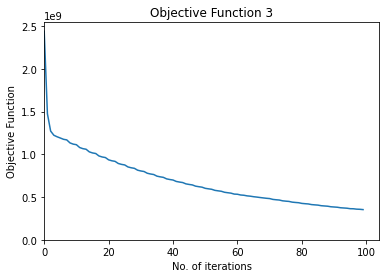

In [30]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

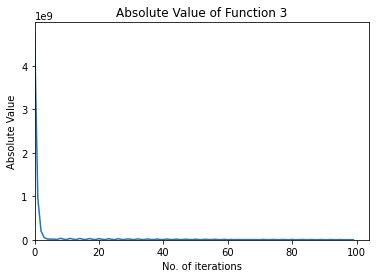

In [31]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

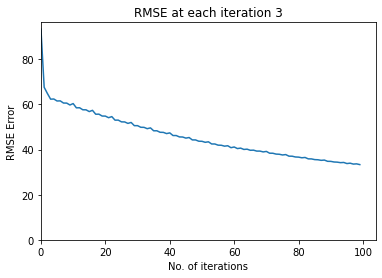

In [32]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### 2. Steplength-Bolddriver as given in lecture slides

In [33]:
df1=airline_dataframe[["Average_Fare","Distance","price"]]

In [34]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [35]:
X=df_train.iloc[:,0:2]
y=df_train.iloc[:,2:]
X_test=df_test.iloc[:,0:2]
y_test=df_test.iloc[:,2:]
y_test

,price
0,111.03
2,167.12
6,148.59
7,174.00
10,200.93
...,...
988,143.53
991,66.32
994,252.34
996,82.55


In [36]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [47]:
def minimise_gd(X,y,beta,imax,epsilon):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        mu=steplength_bolddriver(X,temp,0.0001,0.01,0.05) #If its 0.01 then cost function increases with iterations and for 0.001 it decreases with iterations
        beta=beta_old-(mu*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

def steplength_bolddriver(X,temp,mu_old,stepsize_increase,stepsize_decrease):
    mu=mu_old*stepsize_increase
#     while ((least_square_function(X, y, beta)-least_square_function(X, y, beta-2*mu*temp)).item(0)<=0): #This increases computation time a lot
#         mu=mu*stepsize_decrease 
    if((least_square_function(X, y, beta)>least_square_function(X, y, beta-(1/len(y))*mu*temp)).item(0)):
        return mu*stepsize_increase 
    else:
        return mu*stepsize_decrease
#     return mu

In [48]:
#Here learning rate is not defined
#alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([3,1])
beta_old=np.zeros([3,1])
print(np.shape(X))
a,bold,c,d=minimise_gd(X,y,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",bold)
print("Absolute values are",c)
print("RMSE at each step is",d)

(800, 3)
[[0.]
 [0.]
 [0.]]
[[1.42506275e-06]
 [2.54067538e-04]
 [1.66133579e-03]]
[[2.83235702e-06]
 [5.04894085e-04]
 [3.29735932e-03]]
[[4.22215251e-06]
 [7.52528834e-04]
 [4.90845503e-03]]
[[5.59471481e-06]
 [9.97020234e-04]
 [6.49500154e-03]]
[[6.95030551e-06]
 [1.23841600e-03]
 [8.05737174e-03]]
[[8.28918218e-06]
 [1.47676311e-03]
 [9.59593281e-03]]
[[9.61159853e-06]
 [1.71210784e-03]
 [1.11110464e-02]]
[[1.09178044e-05]
 [1.94449576e-03]
 [1.26030686e-02]]
[[1.22080457e-05]
 [2.17397176e-03]
 [1.40723502e-02]]
[[1.34825649e-05]
 [2.40058002e-03]
 [1.55192366e-02]]
[[1.47416006e-05]
 [2.62436408e-03]
 [1.69440679e-02]]
[[1.59853877e-05]
 [2.84536679e-03]
 [1.83471792e-02]]
[[1.72141576e-05]
 [3.06363038e-03]
 [1.97289002e-02]]
[[1.84281384e-05]
 [3.27919640e-03]
 [2.10895560e-02]]
[[1.96275543e-05]
 [3.49210581e-03]
 [2.24294664e-02]]
[[2.08126265e-05]
 [3.70239892e-03]
 [2.37489466e-02]]
[[2.19835727e-05]
 [3.91011544e-03]
 [2.50483068e-02]]
[[2.31406072e-05]
 [4.11529448e-03]
 

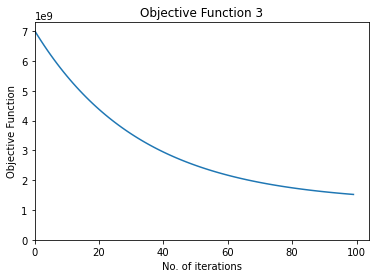

In [49]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(bold,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

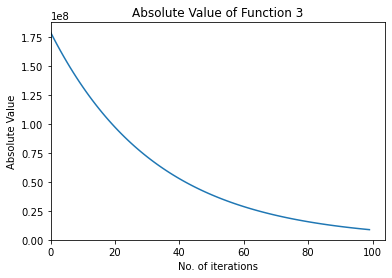

In [50]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

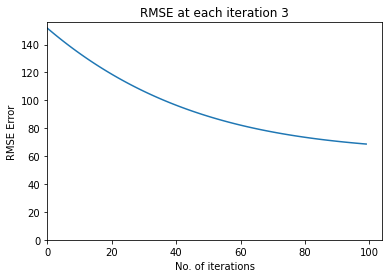

In [51]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### LookAhead Optimiser
Lookahead maintains a set of slow weights φ and fast weights θ, which get synced with the fast weights every k updates.
The fast weights are updated through applying A, any standard optimization algorithm, to batches of training examples sampled from the dataset D. After k inner optimizer updates using A, the slow weights are updated towards the fast weights by linearly interpolating in weight space, θ − φ. We denote the slow weights learning rate as α. After each slow weights update, the fast weights are reset to the current slow weights value

Reference Paper on :Lookahead Optimizer: k steps forward, 1 step back

In [52]:
df1=airline_dataframe[["Average_Fare","Distance","price"]]

In [53]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [54]:
X=df_train.iloc[:,0:2]
y=df_train.iloc[:,2:]
X_test=df_test.iloc[:,0:2]
y_test=df_test.iloc[:,2:]
y_test

,price
0,111.03
2,167.12
6,148.59
7,174.00
10,200.93
...,...
988,143.53
991,66.32
994,252.34
996,82.55


In [55]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [58]:
def lookahead_optimiser(X,y,beta,beta_old,slow_weight,k,slow_weight_stepsize,tmax):
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for t in range (tmax):
        beta=slow_weight
        for i in range(k):
            X_d,y_d=create_minibatch(X,y)
            beta_old=beta
            beta=beta_old+minimise_gd(X_d,y_d,0.0000001,beta_old,100)
        slow_weight_old=slow_weight
        slow_weight=slow_weight_old+slow_weight_stepsize*(np.subtract(beta,slow_weight_old))
        J_history.append(least_square_function(X, y, slow_weight))
        abs_value.append(abs(least_square_function(X, y, slow_weight_old)-least_square_function(X, y, slow_weight)))
        rmse_value.append(find_rmse(slow_weight))
    return slow_weight,J_history,abs_value,rmse_value
    
def create_minibatch(X,y):
    x_s = pd.DataFrame(data=X,  columns=["1", "2","3"])
    y_s = pd.DataFrame(data=y,  columns=["1"])
    frames=[x_s,y_s]
    final=pd.concat(frames,axis=1,ignore_index=True)
    final=final.sample(frac=0.1,random_state=200)
    X=final.iloc[:,1:3]
    y=final.iloc[:,3:]
    m=len(y)
    X_final = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
    y_final = np.array(y).reshape(-1,1) 
    return X_final,y_final
    
    
    
def minimise_gd(X,y,alpha,beta,imax):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
#         print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta
#,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

In [59]:
tmax=100
beta=np.zeros([3,1])
beta_old=np.zeros([3,1])
slow_weight=np.zeros([3,1])
print(np.shape(X))
a,b,c,d=lookahead_optimiser(X,y,beta,beta_old,slow_weight,10,0.00003,tmax)
# a,b,c,d=minimise_gd(X,y,alpha,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(800, 3)
Final beta value is [[ 0.00255822]
 [ 0.43591546]
 [-0.04778497]]
Function values are [7194029383.99264, 7186073901.683256, 7178020908.7670355, 7169868414.811626, 7161614395.118391, 7153256790.438398, 7144793506.704414, 7136222414.780381, 7127541350.229767, 7118748113.104373, 7109840467.755267, 7100816142.667506, 7091672830.320552, 7082408187.076241, 7073019833.096379, 7063505352.292106, 7053862292.307241, 7044088164.538061, 7034180444.191954, 7024136570.387631, 7013953946.299669, 7003629939.350289, 6993161881.4515, 6982547069.300816, 6971782764.733976, 6960866195.138274, 6949794553.93025, 6938565001.101753, 6927174663.83854, 6915620637.2158165, 6903899984.975332, 6892009740.388918, 6879946907.213536, 6867708460.74326, 6855291348.963777, 6842692493.815388, 6829908792.570691, 6816937119.333529, 6803774326.66604, 6790417247.351035, 6776862696.297301, 6763107472.595745, 6749148361.734766, 6734982137.983598, 6720605566.952837, 6706015408.341798, 6691208418.882868, 6676181355.49342

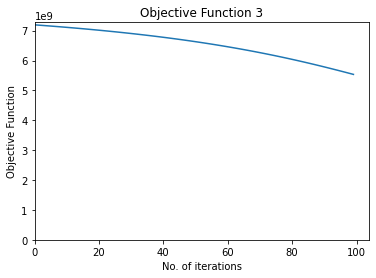

In [60]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

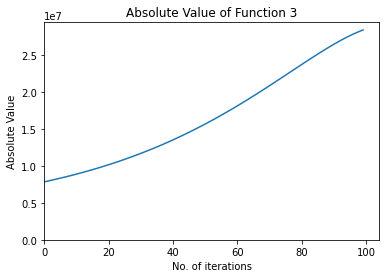

In [61]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

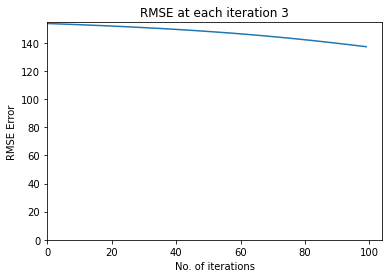

In [62]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### Declare a winning step-length controller based on the metric RMSE. You should tune the associatedhyperparameters of the step-length controller(s).

##### According to the Model, Selected Pararmeters and columns Stepsize Backtracking gives the best RMSE Reduction over iterations

#### References:
 - https://medium.com/nothingaholic/multiple-linear-regression-with-python-22e2087cd628
 - https://www.askpython.com/python/examples/rmse-root-mean-square-error
 - https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
 - https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically